#### CIFAR 10 실습

In [1]:
import pandas as pd
import numpy as np
import os

from tensorflow.keras.datasets import cifar10

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [3]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [4]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', \
                'ship', 'truck'])

print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


### CIFAR 10 시각화

[6] 6
[9] 9
[9] 9
[4] 4
[1] 1
[1] 1
[2] 2
[7] 7
[8] 8
[3] 3
[4] 4
[7] 7
[7] 7
[2] 2
[9] 9
[9] 9


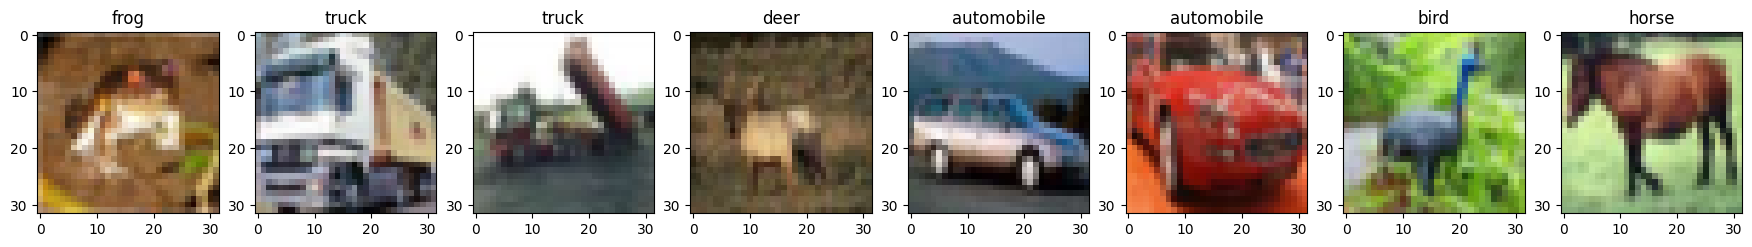

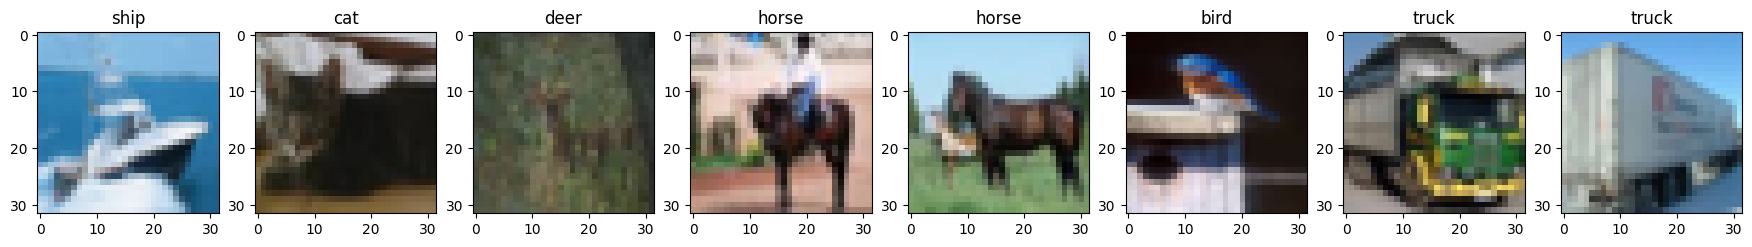

In [5]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22,6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        print(labels[i],label)
        axs[i].set_title(NAMES[int(label)])

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

## Data preprocessing

In [6]:
def get_preprocessed_data(images, labels):
    # 학습과 테스트 이미지 array를 0-1 사이값으로 scale 및 float32 형 변경
    # compile함수에서 loss = categorical_crossentropy일 경우 fit시점의 label값을 one-hot encoding된값으로 입력
    # compile함수에서 loss = sparse_categorical_crossentropy일 경우 fit시점의 label값을 Label Encoding된 값으로 입력 (정수(int)형태인 경우)
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [18]:
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [19]:
train_images[0, :,:,:]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [21]:
train_labels

array([[6.],
       [9.],
       [9.],
       ...,
       [9.],
       [1.],
       [1.]], dtype=float32)

In [22]:
test_labels

array([[3.],
       [8.],
       [8.],
       ...,
       [5.],
       [1.],
       [7.]], dtype=float32)

In [23]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

In [24]:
train_labels

array([6., 9., 9., ..., 9., 1., 1.], dtype=float32)

In [26]:
test_labels

array([3., 8., 8., ..., 5., 1., 7.], dtype=float32)

## Custom model 생성

<img src="./data/b.jpg">

In [27]:
IMAGE_SIZE = 32

In [28]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

In [29]:
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x =  MaxPooling2D(pool_size=(2,2))(x)

In [30]:
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

In [31]:
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

In [32]:
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)

In [33]:
output = Dense(10, activation='softmax', name='output')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                           

In [34]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 77s 114ms/step - loss: 1.6350 - accuracy: 0.3970 - val_loss: 1.4175 - val_accuracy: 0.4815
Epoch 2/30
665/665 [==============================] - 76s 114ms/step - loss: 1.1508 - accuracy: 0.5884 - val_loss: 1.0415 - val_accuracy: 0.6292
Epoch 3/30
665/665 [==============================] - 74s 111ms/step - loss: 0.9644 - accuracy: 0.6575 - val_loss: 0.8354 - val_accuracy: 0.6991
Epoch 4/30
665/665 [==============================] - 72s 108ms/step - loss: 0.8416 - accuracy: 0.7016 - val_loss: 0.7432 - val_accuracy: 0.7356
Epoch 5/30
665/665 [==============================] - 72s 108ms/step - loss: 0.7601 - accuracy: 0.7326 - val_loss: 0.7114 - val_accuracy: 0.7519
Epoch 6/30
665/665 [==============================] - 72s 108ms/step - loss: 0.6894 - accuracy: 0.7582 - val_loss: 0.6816 - val_accuracy: 0.7629
Epoch 7/30
665/665 [==============================] - 74s 111ms/step - loss: 0.6340 - accuracy: 0.7777 - val_loss: 0.6347 - val_ac

KeyboardInterrupt: 

In [ ]:
history.history

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
show_history(history)

313/313 [==============================] - 6s 17ms/step - loss: 2.3038 - accuracy: 0.1086


[2.3038017749786377, 0.10859999805688858]

In [ ]:
# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

In [ ]:
preds = model.predict(test_images[0])

ValueError: in user code:

    File "c:\Users\TAEYONG\anaconda3\envs\study\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\TAEYONG\anaconda3\envs\study\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\TAEYONG\anaconda3\envs\study\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\TAEYONG\anaconda3\envs\study\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\TAEYONG\anaconda3\envs\study\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\TAEYONG\anaconda3\envs\study\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)


In [ ]:
preds = model.predict(np.expand_dims(test_images[0], axis=0))
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)
preds.argmax()

In [ ]:
preds = model.predict(test_images[:32], batch_size=32)
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

In [ ]:
predicted_class = np.argmax(preds, axis=1)
print('예측값',predicted_class)

In [ ]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)